In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from decimal import Decimal
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
path =r"C:/Users/mjc341/Desktop/UMAN 1543 MBS Transfer Admissions Analysis"
path

'C:/Users/mjc341/Desktop/UMAN 1543 MBS Transfer Admissions Analysis'

In [3]:
dataset = pd.read_excel(path + "/Amilcahs_FILES/XFR_ADBU_DATA_REboot2_v.13.xlsx", sheet_name="AGG_Pop", 
                     index_col=False)
dataset.head(3)

,ID,XFR_BUS_UNIQUE_ID,ADMT_TERM,GENDER,FGEN,IM_EFC,AY,PROFILE,FAFSA,COA,...,MTH 161 Pass Fail,MAS 201PASS FAIL,MAS 202 PASS FAIL,FIN 302 Pass FAIL,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,GRADES
0,50432885,2158-50432885,2158,Male,0,164603.0,2016.0,Y,Y,62342.0,...,0,FAIL,PASS,0,NaN,NaN,NaN,NaN,NaN,"''=IF(AG2= ""A+"", ""A"",IF(AG2=""A"",""A"",IF(AG2=""A-..."
1,50457667,2158-50457667,2158,Female,0,NaN,NaN,N,N,NaN,...,0,PASS,PASS,PASS,NaN,NaN,NaN,NaN,NaN,NaN
2,50475188,2158-50475188,2158,Male,0,NaN,NaN,N,N,NaN,...,0,PASS,PASS,PASS,NaN,NaN,NaN,NaN,NaN,"""""""=IF(W2=0,0,IF(W2=""A"",""PASS"",IF(W2=""A+"", ""PA..."


In [4]:
dataset.drop(columns=['GRADES','Unnamed: 64', 'Unnamed: 65',
                      'Unnamed: 66','Unnamed: 67','Unnamed: 68'],
            inplace=True)
dataset["URM"]=0
dataset.loc[dataset['ETH'] == "American Indian/Alaska Native", 'URM'] = 1
dataset.loc[dataset['ETH'] == "Black/African American", 'URM'] = 1
dataset.loc[dataset['ETH'] == "Hispanic/Latino", 'URM'] = 1
dataset.loc[dataset['ETH'] == "Native Hawaiian/Other Pacific Islander", 'URM'] = 1
dataset.loc[dataset['ETH'] == "Two or More Races", 'URM'] = 1
dataset.head(3)

,ID,XFR_BUS_UNIQUE_ID,ADMT_TERM,GENDER,FGEN,IM_EFC,AY,PROFILE,FAFSA,COA,...,MAS202_5_point_Scale,MAS202_FULL_Scale,FIN302_GRADE,FIN302_5_point_Scale,FIN302_FULL_Scale,MTH 161 Pass Fail,MAS 201PASS FAIL,MAS 202 PASS FAIL,FIN 302 Pass FAIL,URM
0,50432885,2158-50432885,2158,Male,0,164603.0,2016.0,Y,Y,62342.0,...,C,2,,,,0,FAIL,PASS,0,0
1,50457667,2158-50457667,2158,Female,0,NaN,NaN,N,N,NaN,...,A,4,A-,A,4,0,PASS,PASS,PASS,0
2,50475188,2158-50475188,2158,Male,0,NaN,NaN,N,N,NaN,...,B,3,A-,A,4,0,PASS,PASS,PASS,0


In [5]:
#For Yr 1 aggregate persistence
dataset2 = dataset.loc[dataset['ADMT_TERM']<2178]
#For Yr 2 aggregate persistence
dataset3 = dataset.loc[dataset['ADMT_TERM']<2168]

In [6]:
dataset2.head(2)

,ID,XFR_BUS_UNIQUE_ID,ADMT_TERM,GENDER,FGEN,IM_EFC,AY,PROFILE,FAFSA,COA,...,MAS202_5_point_Scale,MAS202_FULL_Scale,FIN302_GRADE,FIN302_5_point_Scale,FIN302_FULL_Scale,MTH 161 Pass Fail,MAS 201PASS FAIL,MAS 202 PASS FAIL,FIN 302 Pass FAIL,URM
0,50432885,2158-50432885,2158,Male,0,164603.0,2016.0,Y,Y,62342.0,...,C,2,,,,0,FAIL,PASS,0,0
1,50457667,2158-50457667,2158,Female,0,NaN,NaN,N,N,NaN,...,A,4,A-,A,4,0,PASS,PASS,PASS,0


In [8]:
dataset3.head(2)


,ID,XFR_BUS_UNIQUE_ID,ADMT_TERM,GENDER,FGEN,IM_EFC,AY,PROFILE,FAFSA,COA,...,MAS202_5_point_Scale,MAS202_FULL_Scale,FIN302_GRADE,FIN302_5_point_Scale,FIN302_FULL_Scale,MTH 161 Pass Fail,MAS 201PASS FAIL,MAS 202 PASS FAIL,FIN 302 Pass FAIL,URM
0,50432885,2158-50432885,2158,Male,0,164603.0,2016.0,Y,Y,62342.0,...,C,2,,,,0,FAIL,PASS,0,0
1,50457667,2158-50457667,2158,Female,0,NaN,NaN,N,N,NaN,...,A,4,A-,A,4,0,PASS,PASS,PASS,0


In [9]:
dataset2.columns

Index(['ID', 'XFR_BUS_UNIQUE_ID', 'ADMT_TERM', 'GENDER', 'FGEN', 'IM_EFC',
       'AY', 'PROFILE', 'FAFSA', 'COA', 'NDRK', 'NDRK7', 'FULL_TIME',
       'ADMIT_TYPE', 'EXT ORG ID', 'CEEB', 'Transfer Inst', 'AACSB',
       'Transfer Inst Type', 'Calc Ready', 'SCHOOL', 'ETH', 'UGBU_ADBU',
       'COMBO_ADMIT', 'INIT_BMK_MAJOR_16', 'DEGREE_TYPE', 'MTH 161 Ready',
       'PRECALC-1 Ready', 'PRECALC Ready', 'ALGEBRA Ready', 'MTH161_CREDIT',
       'MAS201_CREDIT(12)', 'MTH161_TERM', 'MAS201_TERM', 'MR_GPA',
       'ACAD_LEVEL', 'PERSIST_YR1', 'PERSIST_YR2', 'PERSIST_YR2_DEC_N',
       'PERSIST_BU_YR1', 'PERSIST_BU_YR1_OF_PERSIST', 'PERSIST_BU_YR2',
       'PERSIST_BU_YR2_OF_PERSIST', 'PERSIST_BU_YR2_DEC_N',
       'BM/OTHERSCHOOL 2168', 'BM SCHOOL 2168', 'BM SCHOOL2178', 'AA_DEGREE',
       'MTH161_GRADE', 'MTH161_5pt_SCALE', 'MTH161_FULL_Scale', 'MAS201_GRADE',
       'MAS201_5Pt_Scale (25)', 'MAS201_FULL_Scale', 'MAS202_GRADE',
       'MAS202_5_point_Scale', 'MAS202_FULL_Scale', 'FIN302_GR

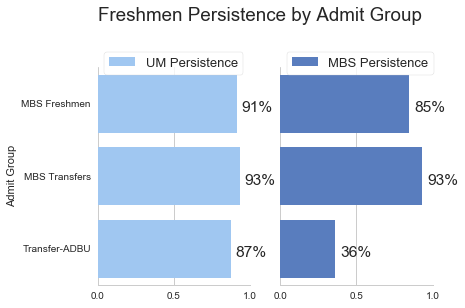

In [10]:
# Initialize the matplotlib figure
fig, (ax1, ax2) =plt.subplots(ncols =2, sharey =True)
sns.set_context('talk')
fig.suptitle ('Freshmen Persistence by Admit Group',y=1.09)

# Plot total UM persistence
sns.set_color_codes("pastel")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT",data=dataset2,
            label="UM Persistence", color="b", ci=None, ax = ax1)
#Add a title
#plt.title("Year 1 Persistence by Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.2)

# Plot MBS persistence
sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1", y= 'COMBO_ADMIT', data=dataset2,
            label="MBS Persistence", color="b", ci=None, ax = ax2)


# Add a legend and informative axis label
ax1.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax1.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="")
sns.despine(left=True, bottom=False) 

ax2.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax2.set(xlim=(0, 1), ylabel="",
       xlabel="")
sns.despine(left=True, bottom=False)

# Iterate through the list of axes' patches
for p in ax1.patches:
    ax1.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')
for p in ax2.patches:
    ax2.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')  
# Save graphic to specified path
plt.savefig(path + '/mbs_yr1_persistence_w_2_axisNAMEDFreshmen.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

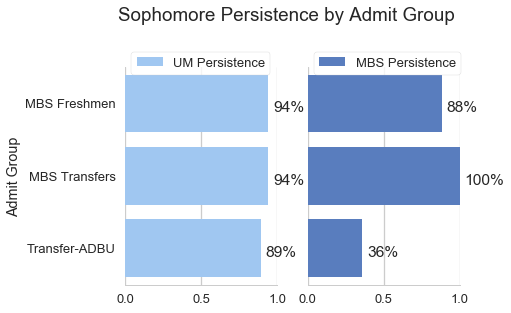

In [11]:
# Initialize the matplotlib figure
# craete 2 figures side by side share the Y axis
fig, (ax1, ax2) =plt.subplots(ncols =2, sharey =True)
sns.set_context('talk')
#create a supertitle for both figures, can have titles over each plot also using plt.title
fig.suptitle ('Sophomore Persistence by Admit Group',y=1.09)

# Plot total UM persistence on ax1
sns.set_color_codes("pastel")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT",data=dataset3,
            label="UM Persistence", color="b", ci=None, ax = ax1)
#Add a title
#plt.title("plt 1", fontweight="bold", fontsize=16, loc="center", y=1.2)

# Plot MBS persistence on ax2
sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y= 'COMBO_ADMIT', data=dataset2,
            label="MBS Persistence", color="b", ci=None, ax = ax2)

#Add a title
#plt.title("plt 2", fontweight="bold", fontsize=16, loc="center", y=1.2)

# Add a legend and informative axis label for each ax
ax1.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax1.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="")
sns.despine(left=True, bottom=False) 

ax2.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax2.set(xlim=(0, 1), ylabel="",
       xlabel="")
sns.despine(left=True, bottom=False)

# Iterate through the list of axes' patches and annotate with a percentage
for p in ax1.patches:
    ax1.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')
for p in ax2.patches:
    ax2.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')  
# Save graphic to specified path
plt.savefig(path + '/mbs_yr2_persistence_w_2_axisNAMEDSophomore.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [15]:
#create an excel file and send it to the path folder
#writer = pd.ExcelWriter(path +'/'+ 'ds2.xlsx')
#writer.save()

In [16]:
#plt.get_backend()

'module://ipykernel.pylab.backend_inline'

In [12]:
len(dataset2)

1145

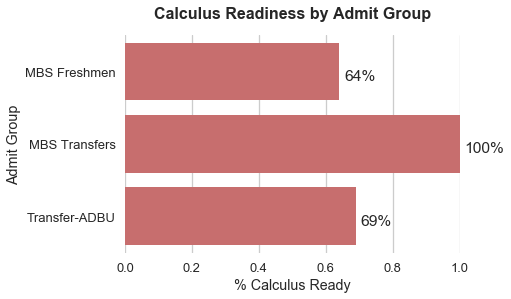

In [22]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot MBS persistence
sns.set_color_codes("muted")
sns.barplot(x="Calc Ready", y="COMBO_ADMIT", data=dataset2,
            label="MBS Persistence", color="r", ci=None)

# Add a title
plt.title("Calculus Readiness by Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.05)

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="% Calculus Ready")
sns.despine(left=True, bottom=True)

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')
    
# Save graphic to specified path
plt.savefig(path + '/mbs_calculus_readyNAMED.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

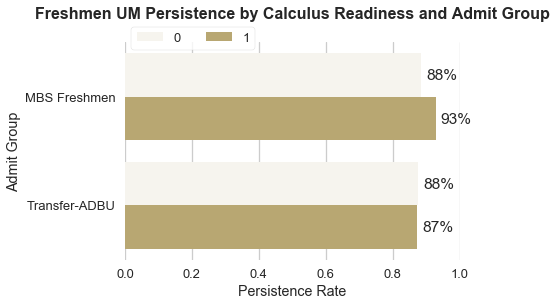

In [13]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="Calc Ready", data=dataset2.loc[dataset2['COMBO_ADMIT']!='MBS Transfers'],
            color="y", ci=None)

# Add a title
plt.title("Freshmen UM Persistence by Calculus Readiness and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=3, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr1_persistence_calc_readyNAMEDFreshmen.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

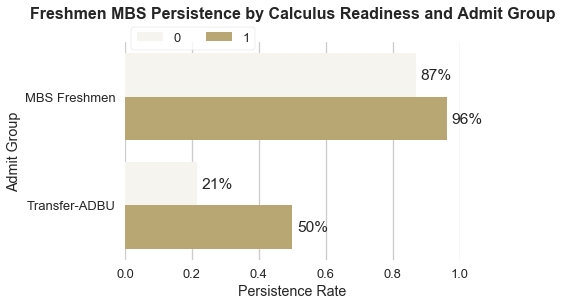

In [14]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="Calc Ready", data=dataset2.loc[dataset2['COMBO_ADMIT']!='MBS Transfers'],
            color="y", ci=None)

# Add a title
plt.title("Freshmen MBS Persistence by Calculus Readiness and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr1_persistence_calc_readyNAMED.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

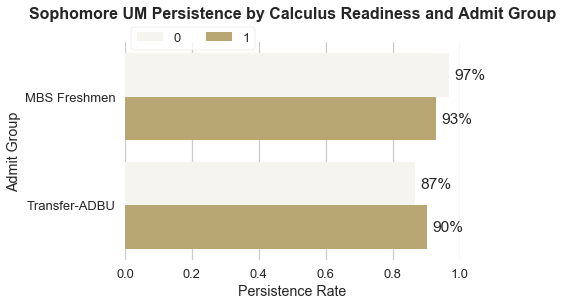

In [15]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="Calc Ready", data=dataset3.loc[dataset3['COMBO_ADMIT']!='MBS Transfers'],
            color="y", ci=None)

# Add a title
plt.title("Sophomore UM Persistence by Calculus Readiness and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr2_persistence_calc_readyNAMED.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

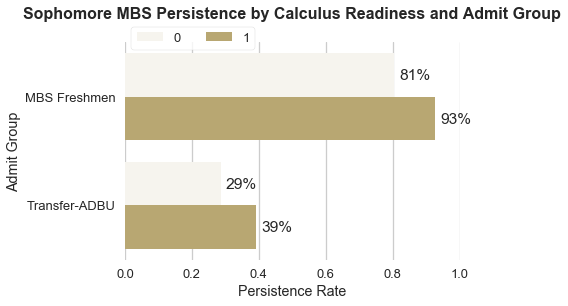

In [16]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="Calc Ready", data=dataset3.loc[dataset3['COMBO_ADMIT']!='MBS Transfers'],
            color="y", ci=None)

# Add a title
plt.title("Sophomore MBS Persistence by Calculus Readiness and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr2_persistence_calc_readyNAMED.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

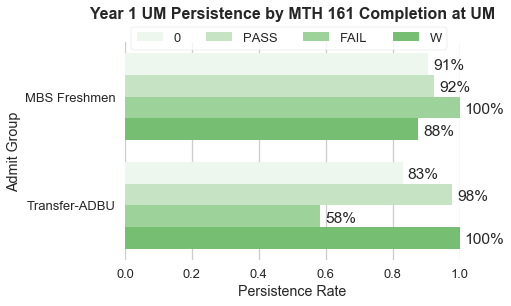

In [35]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset2.loc[dataset2['COMBO_ADMIT']!='MBS Transfers'],
            color="g", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by MTH 161 Completion at UM", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_um_yr1NAMED.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

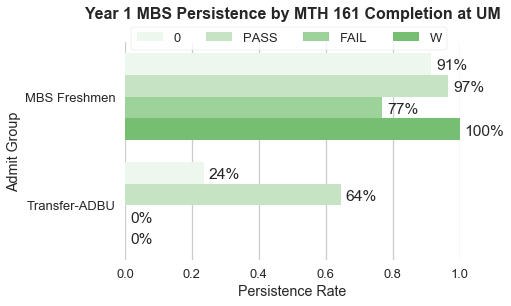

In [36]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset2.loc[dataset2['COMBO_ADMIT']!='MBS Transfers'],
            color="g", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by MTH 161 Completion at UM", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_mbs_yr1NAMED.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

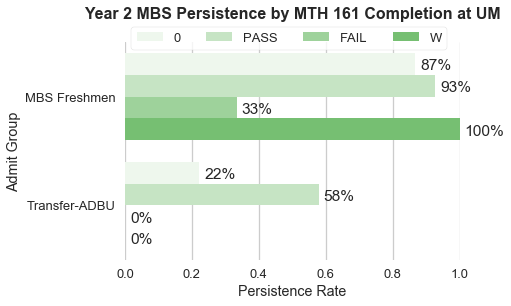

In [37]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset3.loc[dataset3['COMBO_ADMIT']!='MBS Transfers'],
            color="g", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by MTH 161 Completion at UM", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_mbs_yr2NAMED.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

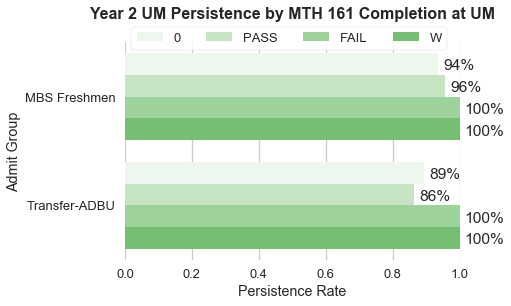

In [40]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset3.loc[dataset3['COMBO_ADMIT']!='MBS Transfers'],
            color="g", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by MTH 161 Completion at UM", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_um_yr2NAMED.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [41]:
dataset2.head(2)


,ID,XFR_BUS_UNIQUE_ID,ADMT_TERM,GENDER,FGEN,IM_EFC,AY,PROFILE,FAFSA,COA,...,MAS202_5_point_Scale,MAS202_FULL_Scale,FIN302_GRADE,FIN302_5_point_Scale,FIN302_FULL_Scale,MTH 161 Pass Fail,MAS 201PASS FAIL,MAS 202 PASS FAIL,FIN 302 Pass FAIL,URM
0,50432885,2158-50432885,2158,Male,0,164603.0,2016.0,Y,Y,62342.0,...,C,2,,,,0,FAIL,PASS,0,0
1,50457667,2158-50457667,2158,Female,0,NaN,NaN,N,N,NaN,...,A,4,A-,A,4,0,PASS,PASS,PASS,0


In [42]:
dataset2.columns

Index(['ID', 'XFR_BUS_UNIQUE_ID', 'ADMT_TERM', 'GENDER', 'FGEN', 'IM_EFC',
       'AY', 'PROFILE', 'FAFSA', 'COA', 'NDRK', 'NDRK7', 'FULL_TIME',
       'ADMIT_TYPE', 'EXT ORG ID', 'CEEB', 'Transfer Inst', 'AACSB',
       'Transfer Inst Type', 'Calc Ready', 'SCHOOL', 'ETH', 'UGBU_ADBU',
       'COMBO_ADMIT', 'INIT_BMK_MAJOR_16', 'DEGREE_TYPE', 'MTH 161 Ready',
       'PRECALC-1 Ready', 'PRECALC Ready', 'ALGEBRA Ready', 'MTH161_CREDIT',
       'MAS201_CREDIT(12)', 'MTH161_TERM', 'MAS201_TERM', 'MR_GPA',
       'ACAD_LEVEL', 'PERSIST_YR1', 'PERSIST_YR2', 'PERSIST_YR2_DEC_N',
       'PERSIST_BU_YR1', 'PERSIST_BU_YR1_OF_PERSIST', 'PERSIST_BU_YR2',
       'PERSIST_BU_YR2_OF_PERSIST', 'PERSIST_BU_YR2_DEC_N',
       'BM/OTHERSCHOOL 2168', 'BM SCHOOL 2168', 'BM SCHOOL2178', 'AA_DEGREE',
       'MTH161_GRADE', 'MTH161_5pt_SCALE', 'MTH161_FULL_Scale', 'MAS201_GRADE',
       'MAS201_5Pt_Scale (25)', 'MAS201_FULL_Scale', 'MAS202_GRADE',
       'MAS202_5_point_Scale', 'MAS202_FULL_Scale', 'FIN302_GR

In [17]:
dataset2.columns


Index(['ID', 'XFR_BUS_UNIQUE_ID', 'ADMT_TERM', 'GENDER', 'FGEN', 'IM_EFC',
       'AY', 'PROFILE', 'FAFSA', 'COA', 'NDRK', 'NDRK7', 'FULL_TIME',
       'ADMIT_TYPE', 'EXT ORG ID', 'CEEB', 'Transfer Inst', 'AACSB',
       'Transfer Inst Type', 'Calc Ready', 'SCHOOL', 'ETH', 'UGBU_ADBU',
       'COMBO_ADMIT', 'INIT_BMK_MAJOR_16', 'DEGREE_TYPE', 'MTH 161 Ready',
       'PRECALC-1 Ready', 'PRECALC Ready', 'ALGEBRA Ready', 'MTH161_CREDIT',
       'MAS201_CREDIT(12)', 'MTH161_TERM', 'MAS201_TERM', 'MR_GPA',
       'ACAD_LEVEL', 'PERSIST_YR1', 'PERSIST_YR2', 'PERSIST_YR2_DEC_N',
       'PERSIST_BU_YR1', 'PERSIST_BU_YR1_OF_PERSIST', 'PERSIST_BU_YR2',
       'PERSIST_BU_YR2_OF_PERSIST', 'PERSIST_BU_YR2_DEC_N',
       'BM/OTHERSCHOOL 2168', 'BM SCHOOL 2168', 'BM SCHOOL2178', 'AA_DEGREE',
       'MTH161_GRADE', 'MTH161_5pt_SCALE', 'MTH161_FULL_Scale', 'MAS201_GRADE',
       'MAS201_5Pt_Scale (25)', 'MAS201_FULL_Scale', 'MAS202_GRADE',
       'MAS202_5_point_Scale', 'MAS202_FULL_Scale', 'FIN302_GR

In [20]:
dataset4 = dataset2[['ID','PERSIST_YR1',"PERSIST_YR2_DEC_N","PERSIST_BU_YR1_OF_PERSIST","PERSIST_BU_YR2_OF_PERSIST",'COMBO_ADMIT','MTH 161 Pass Fail']]

In [25]:
dataset4.head(10)


,ID,PERSIST_YR1,PERSIST_YR2_DEC_N,PERSIST_BU_YR1_OF_PERSIST,PERSIST_BU_YR2_OF_PERSIST,COMBO_ADMIT,MTH 161 Pass Fail
0,50432885,1.0,0.0,1.0,NaN,MBS Freshmen,0
1,50457667,1.0,1.0,1.0,1.0,MBS Freshmen,0
2,50475188,1.0,1.0,1.0,1.0,MBS Transfers,0
3,50480064,1.0,1.0,0.0,0.0,MBS Freshmen,0
4,50480105,1.0,1.0,1.0,1.0,MBS Freshmen,0
5,50480115,1.0,1.0,1.0,1.0,MBS Freshmen,PASS
6,50480127,1.0,0.0,1.0,NaN,MBS Freshmen,PASS
7,54000209,1.0,1.0,1.0,1.0,MBS Freshmen,PASS
8,54000751,1.0,1.0,1.0,1.0,MBS Freshmen,0
9,53673491,1.0,1.0,1.0,1.0,MBS Freshmen,0


In [27]:
dataset5 = dataset4.loc[dataset4['COMBO_ADMIT']!='MBS Transfers']

In [28]:
dataset5.head(2)

,ID,PERSIST_YR1,PERSIST_YR2_DEC_N,PERSIST_BU_YR1_OF_PERSIST,PERSIST_BU_YR2_OF_PERSIST,COMBO_ADMIT,MTH 161 Pass Fail
0,50432885,1.0,0.0,1.0,NaN,MBS Freshmen,0
1,50457667,1.0,1.0,1.0,1.0,MBS Freshmen,0


No handles with labels found to put in legend.


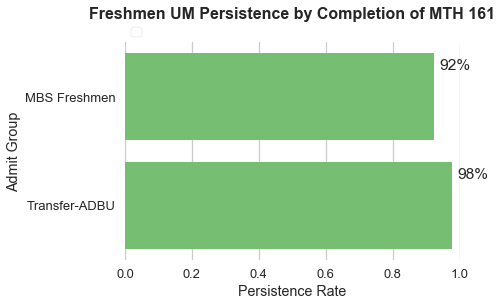

In [31]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", data=dataset5.loc[dataset5['MTH 161 Pass Fail']== 'PASS' ],
            color="g", ci=None)

# Add a title
plt.title("Freshmen UM Persistence by Completion of MTH 161", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
#plt.savefig(path + '/calculus_completion_um_yr1PASSonly.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

No handles with labels found to put in legend.


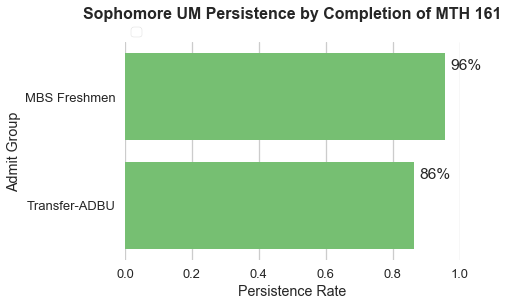

In [33]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", data=dataset5.loc[dataset5['MTH 161 Pass Fail']== 'PASS' ],
            color="g", ci=None)

# Add a title
plt.title("Sophomore UM Persistence by Completion of MTH 161", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
#plt.savefig(path + '/calculus_completion_um_yr1PASSonly.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

No handles with labels found to put in legend.


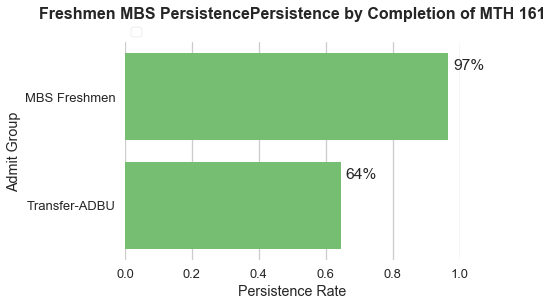

In [34]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", data=dataset5.loc[dataset5['MTH 161 Pass Fail']== 'PASS' ],
            color="g", ci=None)

# Add a title
plt.title("Freshmen MBS PersistencePersistence by Completion of MTH 161", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
#plt.savefig(path + '/calculus_completion_um_yr1PASSonly.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

No handles with labels found to put in legend.


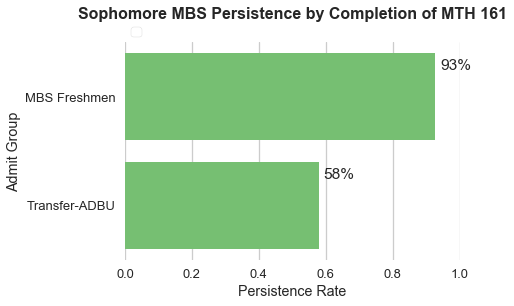

In [36]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", data=dataset5.loc[dataset5['MTH 161 Pass Fail']== 'PASS' ],
            color="g", ci=None)

# Add a title
plt.title("Sophomore MBS Persistence by Completion of MTH 161", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
#plt.savefig(path + '/calculus_completion_um_yr1PASSonly.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

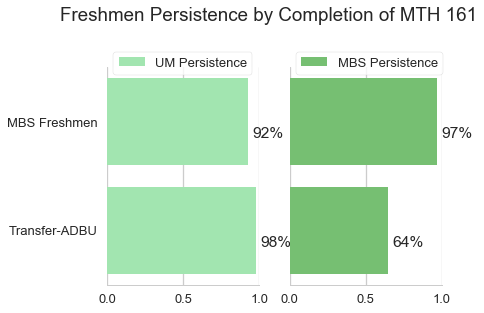

In [43]:
# Initialize the matplotlib figure
fig, (ax1, ax2) =plt.subplots(ncols =2, sharey =True)
sns.set_context('talk')
fig.suptitle ('Freshmen Persistence by Completion of MTH 161',y=1.09)

# Plot total UM persistence
sns.set_color_codes("pastel")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", data=dataset5.loc[dataset5['MTH 161 Pass Fail']== 'PASS' ],
            label="UM Persistence",color="g", ci=None, ax = ax1)
#Add a title
#plt.title("Year 1 Persistence by Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.2)

# Plot MBS persistence
sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", data=dataset5.loc[dataset5['MTH 161 Pass Fail']== 'PASS' ],
           label="MBS Persistence", color="g", ci=None, ax = ax2)


# Add a legend and informative axis label
ax1.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax1.set(xlim=(0, 1), ylabel="",
       xlabel="")
sns.despine(left=True, bottom=False) 

ax2.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax2.set(xlim=(0, 1), ylabel="",
       xlabel="")
sns.despine(left=True, bottom=False)

# Iterate through the list of axes' patches
for p in ax1.patches:
    ax1.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')
for p in ax2.patches:
    ax2.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')  
# Save graphic to specified path
plt.savefig(path + '/FRESHMEN_persistence_MTH161 PASS.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

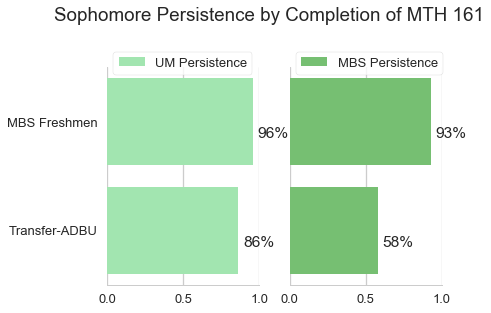

In [42]:
# Initialize the matplotlib figure
fig, (ax1, ax2) = plt.subplots(ncols =2, sharey =True)
sns.set_context('talk')
fig.suptitle ('Sophomore Persistence by Completion of MTH 161',y=1.09)

# Plot total UM persistence
sns.set_color_codes("pastel")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", data=dataset5.loc[dataset5['MTH 161 Pass Fail']== 'PASS' ],
            label="UM Persistence",color="g", ci=None, ax = ax1)
#Add a title
#plt.title("Year 1 Persistence by Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.2)

# Plot MBS persistence
sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", data=dataset5.loc[dataset5['MTH 161 Pass Fail']== 'PASS' ],
           label="MBS Persistence", color="g", ci=None, ax = ax2)


# Add a legend and informative axis label
ax1.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax1.set(xlim=(0, 1), ylabel="",
       xlabel="")
sns.despine(left=True, bottom=False) 

ax2.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax2.set(xlim=(0, 1), ylabel="",
       xlabel="")
sns.despine(left=True, bottom=False)

# Iterate through the list of axes' patches
for p in ax1.patches:
    ax1.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')
for p in ax2.patches:
    ax2.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')  
# Save graphic to specified path
plt.savefig(path + '/Sophomore persistence MTH 161 PASS.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures